<a href="https://colab.research.google.com/github/arman-555/assignment3/blob/main/ResearchMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()  # Выбери terms.txt и non_terms.txt


Saving non_terms.txt to non_terms.txt
Saving terms.txt to terms.txt


In [ ]:
# Функция исправления формата файлов
def fix_file_format(input_file, output_file):
    with open(input_file, "r", encoding="utf-8") as f:
        text = f.read()
    words = text.split(", ")  # Разделяем по запятым
    with open(output_file, "w", encoding="utf-8") as f:
        f.write("\n".join(words))  # Записываем каждое слово с новой строки

# Исправляем оба файла
fix_file_format("terms.txt", "fixed_terms.txt")
fix_file_format("non_terms.txt", "fixed_non_terms.txt")

print("✅ Формат исправлен! Новые файлы: fixed_terms.txt и fixed_non_terms.txt")


✅ Формат исправлен! Новые файлы: fixed_terms.txt и fixed_non_terms.txt


In [ ]:
with open("fixed_terms.txt", "r", encoding="utf-8") as f:
    terms = f.readlines()
    print(f"Термины ({len(terms)} слов):", terms[:10])  # Выведет первые 10 строк

with open("fixed_non_terms.txt", "r", encoding="utf-8") as f:
    non_terms = f.readlines()
    print(f"Не-термины ({len(non_terms)} слов):", non_terms[:10])  # Выведет первые 10 строк


Термины (642 слов): ['Научные вычисления\n', 'моделирование\n', 'физических процессов\n', 'численный анализ\n', 'дифференциальные уравнения\n', 'динамические системы\n', 'аэродинамика\n', 'методы конечных элементов\n', 'прогнозирование\n', 'воздушные потоки\n']
Не-термины (808 слов): ['играют\n', 'важную\n', 'роль\n', 'позволяет\n', 'возникающие\n', 'используются\n', 'для\n', 'прогнозирования\n', 'позволяет\n', 'инженерам\n']


In [ ]:
import pandas as pd

# Загрузка терминов
with open("fixed_terms.txt", "r", encoding="utf-8") as f:
    terms = [line.strip() for line in f.readlines() if line.strip()]

# Загрузка не-терминов
with open("fixed_non_terms.txt", "r", encoding="utf-8") as f:
    non_terms = [line.strip() for line in f.readlines() if line.strip()]

# Создание датаcета
df_terms = pd.DataFrame({"word": terms, "label": 1})
df_non_terms = pd.DataFrame({"word": non_terms, "label": 0})

# Объединение данных
df = pd.concat([df_terms, df_non_terms], ignore_index=True)

# Сохранение в CSV
df.to_csv("dataset.csv", index=False, encoding="utf-8")

print(f" CSV-датаcет сохранен: dataset.csv (Терминов: {len(df_terms)}, Не-терминов: {len(df_non_terms)})")


 CSV-датаcет сохранен: dataset.csv (Терминов: 642, Не-терминов: 808)


In [ ]:
import pandas as pd

df = pd.read_csv("dataset.csv")
print(df.head(10))  # Вывести первые 10 строк


                         word  label
0          Научные вычисления      1
1               моделирование      1
2        физических процессов      1
3            численный анализ      1
4  дифференциальные уравнения      1
5        динамические системы      1
6                аэродинамика      1
7   методы конечных элементов      1
8             прогнозирование      1
9            воздушные потоки      1


In [ ]:
import pandas as pd

# Загружаем датасет
df = pd.read_csv("dataset.csv")

# Убираем дубликаты
df = df.drop_duplicates()

# Убираем пустые строки, если есть
df = df.dropna()

# Удаляем лишние пробелы
df["word"] = df["word"].str.strip()

# Сохраняем очищенный датасет
df.to_csv("cleaned_dataset.csv", index=False, encoding="utf-8")

print(f" Дубликаты удалены! Новый размер датасета: {len(df)} записей")


 Дубликаты удалены! Новый размер датасета: 908 записей


label
1    516
0    392
Name: count, dtype: int64


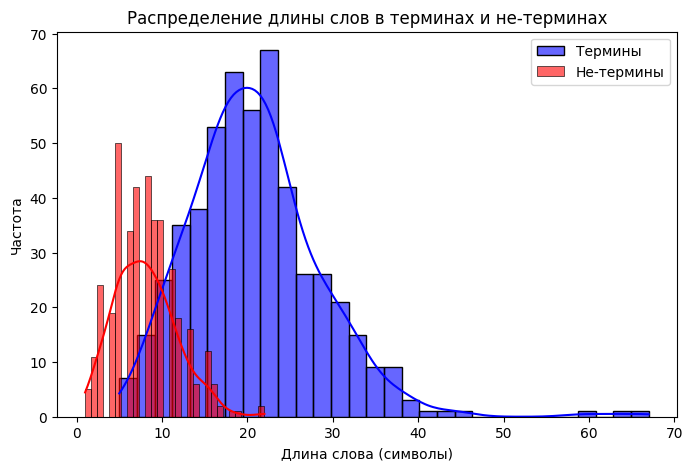

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_dataset.csv")

print(df["label"].value_counts())

df["word_length"] = df["word"].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df[df["label"] == 1]["word_length"], bins=30, kde=True, label="Термины", color="blue", alpha=0.6)
sns.histplot(df[df["label"] == 0]["word_length"], bins=30, kde=True, label="Не-термины", color="red", alpha=0.6)
plt.legend()
plt.title("Распределение длины слов в терминах и не-терминах")
plt.xlabel("Длина слова (символы)")
plt.ylabel("Частота")
plt.show()


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Применение токенизатора к тексту
tokens = df["word"].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

df["tokens"] = tokens
df.to_csv("tokenized_dataset.csv", index=False)

print("Токенизация завершена, датасет сохранен.")


Токенизация завершена, датасет сохранен.


In [ ]:
from transformers import BertTokenizer
import torch
from sklearn.model_selection import train_test_split

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")


# Определяем максимальную длину токенов
max_length = max(len(t) for t in tokens)

# Паддинг токенов до max_length
input_ids = torch.tensor([t + [0] * (max_length - len(t)) for t in tokens])
attention_masks = torch.tensor([[1] * len(t) + [0] * (max_length - len(t)) for t in tokens])
labels = torch.tensor(df["label"].values)

# Разделение на train/test (80/20)
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    input_ids, labels, test_size=0.2, random_state=42
)
train_masks, test_masks, _, _ = train_test_split(
    attention_masks, labels, test_size=0.2, random_state=42
)


In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertForSequenceClassification, AdamW
import torch
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss

batch_size = 16

# Создание DataLoader
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Создание модели
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Используем class weights
class_weights = torch.tensor([2.0, 1.0]).to(device)
loss_function = CrossEntropyLoss(weight=class_weights)

# Обучение модели
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 5  # Больше эпох для лучшего обучения
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

        model.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)

        loss = loss_function(outputs.logits, b_labels)  # Используем Лосс Функцию
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}, Train Loss: {avg_train_loss:.4f}")

    # Проверяем качество на тесте
    model.eval()
    val_loss = 0
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in test_dataloader:
            b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)

            val_loss += loss_function(outputs.logits, b_labels).item()
            predictions.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
            true_labels.extend(b_labels.cpu().numpy())

    avg_val_loss = val_loss / len(test_dataloader)
    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss:.4f}")

# Сохраняем модель после тренировки
model.save_pretrained("bert_model")
print("✅ Модель сохранена в папку 'bert_model'")



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Train Loss: 0.2445
Epoch 1, Validation Loss: 0.0671
Epoch 2, Train Loss: 0.0720
Epoch 2, Validation Loss: 0.1100
Epoch 3, Train Loss: 0.0446
Epoch 3, Validation Loss: 0.0544
Epoch 4, Train Loss: 0.0210
Epoch 4, Validation Loss: 0.0429
Epoch 5, Train Loss: 0.0144
Epoch 5, Validation Loss: 0.1343
✅ Модель сохранена в папку 'bert_model'


In [ ]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#  Загрузка обученной модели
model = BertForSequenceClassification.from_pretrained("bert_model")
model.to(device)
model.eval()

# Загружаем токенизатор
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

print(" Модель успешно загружена!")


 Модель успешно загружена!


In [ ]:
from sklearn.metrics import classification_report

model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in test_dataloader:
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]
        logits = model(b_input_ids, attention_mask=b_input_mask).logits
        predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.extend(b_labels.cpu().numpy())

# Выводим результаты
print(classification_report(true_labels, predictions, target_names=["Не-термин", "Термин"]))


              precision    recall  f1-score   support

   Не-термин       0.89      1.00      0.94        74
      Термин       1.00      0.92      0.96       108

    accuracy                           0.95       182
   macro avg       0.95      0.96      0.95       182
weighted avg       0.96      0.95      0.95       182



In [ ]:
def get_ngrams(words, n=2):
    """Создаёт список биграмм и триграмм"""
    return [" ".join(words[i:i+n]) for i in range(len(words)-n+1)]

def classify_text(text, model, tokenizer, device, threshold=0.5):
    words = text.split()
    bigrams = get_ngrams(words, 2)
    trigrams = get_ngrams(words, 3)
    all_phrases = words + bigrams + trigrams  # Добавляем всё в список

    results = {}
    for phrase in all_phrases:
        label, conf = classify_word(phrase, model, tokenizer, device, threshold)
        results[phrase] = (label, conf)

    return results


In [ ]:
def classify_word(word, model, tokenizer, device, threshold=0.5):
    """Классифицирует одно слово как 'Термин' или 'Не-термин'"""
    encoded_input = tokenizer.batch_encode_plus([word], padding=True, truncation=True, max_length=32, return_tensors="pt")

    input_ids = encoded_input["input_ids"].to(device)
    attention_mask = encoded_input["attention_mask"].to(device)

    with torch.no_grad():
        logits = model(input_ids, attention_mask=attention_mask).logits
        probs = F.softmax(logits, dim=1)[:, 1].cpu().numpy()  # Вероятность быть "Термином"

    prediction = "Термин" if probs[0] >= threshold else "Не-термин"
    confidence = probs[0]

    return prediction, confidence


In [ ]:
!pip install spacy
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 46.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Загружаем обученную модель
model = BertForSequenceClassification.from_pretrained("bert_model")
model.to(device)
model.eval()

# Загружаем токенизатор
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

print(" Модель успешно загружена!")


 Модель успешно загружена!


In [ ]:
import spacy

# Загружаем NLP-модель для русского языка
nlp = spacy.load("ru_core_news_sm")

def remove_verbs_and_prepositions(text):
    """Автоматически удаляет глаголы, предлоги и местоимения"""
    doc = nlp(text)
    filtered_words = [token.text for token in doc if token.pos_ not in {"VERB", "ADP", "PRON", "AUX"}]  # Убираем глаголы, предлоги, местоимения
    return " ".join(filtered_words)

# Пример
text = "Машинное обучение используется для анализа данных"
filtered_text = remove_verbs_and_prepositions(text)
print(filtered_text)  # Ожидаемый вывод: "Машинное обучение анализ данных"


Машинное обучение анализа данных


In [ ]:
def filter_terms_by_length(results, max_length=5):
    """Удаляет слишком длинные термины"""
    return {term: results[term] for term in results if len(term.split()) <= max_length}

def filter_repeated_terms(results):
    """Удаляет дублирующиеся термины (чтобы не было одного и того же 10 раз)"""
    filtered = {}
    for term in results:
        words = term.split()
        if len(set(words)) > len(words) / 2:  # Если половина слов повторяется, игнорируем
            filtered[term] = results[term]
    return filtered


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def filter_by_tfidf(results, text, threshold=0.05):
    """Фильтрует термины, которые встречаются слишком часто (TF-IDF)"""
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text])
    feature_names = vectorizer.get_feature_names_out()
    scores = dict(zip(feature_names, tfidf_matrix.toarray()[0]))

    filtered_terms = {}
    for term in results:
        term_words = term.split()
        avg_tfidf = sum(scores.get(word, 0) for word in term_words) / len(term_words)
        if avg_tfidf >= threshold:
            filtered_terms[term] = results[term]

    return filtered_terms


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
import spacy

# Загружаем модель
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert_model")
model.to(device)
model.eval()

# Загружаем токенизатор
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Загружаем NLP-модель для русского языка
nlp = spacy.load("ru_core_news_sm")

# Фильтрация
MIN_CONFIDENCE = 0.1
MAX_TERM_LENGTH = 7

def get_context_window(text, window_size=3):
    words = text.split()
    context_phrases = []
    for i in range(len(words)):
        left = max(0, i - window_size)
        right = min(len(words), i + window_size + 1)
        phrase = " ".join(words[left:right])
        if len(phrase.split()) <= MAX_TERM_LENGTH:
            context_phrases.append(phrase)
    return context_phrases

def remove_verbs_and_prepositions(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if token.pos_ not in {"VERB", "ADP", "PRON", "AUX"}])

def classify_text_with_context(text, model, tokenizer, device, threshold=0.5):
    text = remove_verbs_and_prepositions(text)
    context_windows = get_context_window(text, window_size=3)
    results = {}

    print("\n🔹 **ПРЕДСКАЗАНИЯ ДО ФИЛЬТРАЦИИ:**")

    for phrase in context_windows:
        encoded_input = tokenizer.batch_encode_plus([phrase], padding=True, truncation=True, max_length=32, return_tensors="pt")
        input_ids = encoded_input["input_ids"].to(device)
        attention_mask = encoded_input["attention_mask"].to(device)

        with torch.no_grad():
            logits = model(input_ids, attention_mask=attention_mask).logits
            probs = F.softmax(logits, dim=1)[:, 1].cpu().numpy()

        prediction = "Термин" if probs[0] >= threshold else "Не-термин"
        confidence = probs[0]

        print(f"{phrase}: {prediction} (Уверенность: {confidence:.2f})")

        if confidence >= MIN_CONFIDENCE:
            results[phrase] = (prediction, confidence)

    return results

text = input("Введите текст для классификации: ")
predictions = classify_text_with_context(text, model, tokenizer, device)

print("\n🔹 **ИТОГОВЫЕ ТЕРМИНЫ:**")
for phrase, (label, confidence) in predictions.items():
    print(f"{phrase}: {label} (Уверенность: {confidence:.2f})")


Введите текст для классификации: Машинное обучение и глубокие нейронные сети активно применяются в биоинформатике, компьютерном зрении и обработке естественного языка. Алгоритмы градиентного спуска позволяют минимизировать функцию ошибки, улучшая точность классификации данных. Например, сверточные нейросети используются для анализа медицинских изобргенажений и диагностики заболеваний. В обработке естественного языка применяются трансформеры, такие как BERT, которые способны генерировать осмысленный текст и анализировать тональность сообщений.

🔹 **ПРЕДСКАЗАНИЯ ДО ФИЛЬТРАЦИИ:**
Машинное обучение и глубокие: Термин (Уверенность: 1.00)
Машинное обучение и глубокие нейронные: Термин (Уверенность: 1.00)
Машинное обучение и глубокие нейронные сети: Термин (Уверенность: 1.00)
Машинное обучение и глубокие нейронные сети активно: Термин (Уверенность: 1.00)
обучение и глубокие нейронные сети активно биоинформатике: Термин (Уверенность: 1.00)
и глубокие нейронные сети активно биоинформатике ,: Те

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
import spacy
import pymorphy3

# 🔥 Загружаем модель
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert_model")
model.to(device)
model.eval()

# Загружаем токенизатор
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Загружаем NLP-модель для русского языка
nlp = spacy.load("ru_core_news_sm")

# Загружаем морфологический анализатор
morph = pymorphy3.MorphAnalyzer()

# Минимальный порог уверенности
MIN_CONFIDENCE = 0.15

def normalize_word(word):
    """Лемматизирует слово (приводит к начальной форме)"""
    return morph.parse(word)[0].normal_form

def classify_single_words(text, model, tokenizer, device, threshold=0.5):
    """Классифицирует только отдельные слова"""
    doc = nlp(text)
    words = [token.text for token in doc if token.is_alpha]  # Оставляем только слова (убираем запятые, точки)

    results = {}

    print("\n🔹 **ПРЕДСКАЗАНИЯ ДЛЯ ОДИНОЧНЫХ СЛОВ:**")

    for word in words:
        normalized_word = normalize_word(word)  # Лемматизация слова

        # Пропускаем слишком короткие слова
        if len(normalized_word) <= 3:
            continue

        encoded_input = tokenizer.batch_encode_plus([normalized_word], padding=True, truncation=True, max_length=32, return_tensors="pt")
        input_ids = encoded_input["input_ids"].to(device)
        attention_mask = encoded_input["attention_mask"].to(device)

        with torch.no_grad():
            logits = model(input_ids, attention_mask=attention_mask).logits
            probs = F.softmax(logits, dim=1)[:, 1].cpu().numpy()

        prediction = "Термин" if probs[0] >= threshold else "Не-термин"
        confidence = probs[0]

        print(f"{normalized_word}: {prediction} (Уверенность: {confidence:.2f})")

        if confidence >= MIN_CONFIDENCE:
            results[normalized_word] = (prediction, confidence)

    return results

text = input("Введите текст для классификации: ")
predictions = classify_single_words(text, model, tokenizer, device)

print("\n🔹 **ИТОГОВЫЕ ОДИНОЧНЫЕ СЛОВА:**")
for word, (label, confidence) in predictions.items():
    print(f"{word}: {label} (Уверенность: {confidence:.2f})")


Введите текст для классификации: Машинное обучение и глубокие нейронные сети активно применяются в биоинформатике, компьютерном зрении и обработке естественного языка. Алгоритмы градиентного спуска позволяют минимизировать функцию ошибки, улучшая точность классификации данных. Например, сверточные нейросети используются для анализа медицинских изобргенажений и диагностики заболеваний. В обработке естественного языка применяются трансформеры, такие как BERT, которые способны генерировать осмысленный текст и анализировать тональность сообщений.

🔹 **ПРЕДСКАЗАНИЯ ДЛЯ ОДИНОЧНЫХ СЛОВ:**
машинный: Не-термин (Уверенность: 0.00)
обучение: Не-термин (Уверенность: 0.00)
глубокий: Не-термин (Уверенность: 0.00)
нейронный: Не-термин (Уверенность: 0.00)
сеть: Не-термин (Уверенность: 0.00)
активно: Не-термин (Уверенность: 0.00)
применяться: Не-термин (Уверенность: 0.00)
биоинформатика: Термин (Уверенность: 1.00)
компьютерный: Не-термин (Уверенность: 0.00)
зрение: Не-термин (Уверенность: 0.00)
обработ

In [ ]:
import nltk
nltk.download("punkt")
nltk.data.path.append("/usr/local/share/nltk_data")  # Указываем правильный путь


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
print(word_tokenize("Машинное обучение используется в анализе данных"))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...


['Машинное', 'обучение', 'используется', 'в', 'анализе', 'данных']


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from gensim.models import Word2Vec
import pandas as pd
from nltk.tokenize import word_tokenize

# Загружаем датасет
df = pd.read_csv("dataset.csv")

# Токенизация текста для обучения модели
sentences = [word_tokenize(text) for text in df["word"]]

# Обучаем Word2Vec
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
w2v_model.save("word2vec.model")

print("✅ Word2Vec успешно обучен и сохранён!")


✅ Word2Vec успешно обучен и сохранён!


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
import spacy
import pymorphy3
from gensim.models import Word2Vec

#  Загружаем модели
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model = BertForSequenceClassification.from_pretrained("bert_model")
bert_model.to(device)
bert_model.eval()

# Загружаем токенизатор
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Загружаем Word2Vec
w2v_model = Word2Vec.load("word2vec.model")

# Загружаем NLP-модели
nlp = spacy.load("ru_core_news_sm")
morph = pymorphy3.MorphAnalyzer()

# Минимальный порог уверенности
MIN_CONFIDENCE = 0.1

def normalize_word(word):
    """Лемматизирует слово (приводит к начальной форме)"""
    return morph.parse(word)[0].normal_form

def classify_single_words_with_bert(text, model, tokenizer, device, threshold=0.5):
    """Классифицирует одиночные слова через BERT"""
    doc = nlp(text)
    words = [token.text for token in doc if token.is_alpha]
    results = {}

    print("\n🔹 **BERT - Предсказания одиночных слов:**")

    for word in words:
        normalized_word = normalize_word(word)

        if len(normalized_word) <= 3:
            continue

        encoded_input = tokenizer.batch_encode_plus([normalized_word], padding=True, truncation=True, max_length=32, return_tensors="pt")
        input_ids = encoded_input["input_ids"].to(device)
        attention_mask = encoded_input["attention_mask"].to(device)

        with torch.no_grad():
            logits = model(input_ids, attention_mask=attention_mask).logits
            probs = F.softmax(logits, dim=1)[:, 1].cpu().numpy()

        prediction = "Термин" if probs[0] >= threshold else "Не-термин"
        confidence = probs[0]

        print(f"{normalized_word}: {prediction} (Уверенность: {confidence:.2f})")

        if confidence >= MIN_CONFIDENCE:
            results[normalized_word] = (prediction, confidence)

    return results

def classify_single_words_with_w2v(text, w2v_model):
    """Классифицирует одиночные слова через Word2Vec"""
    doc = nlp(text)
    words = [token.text for token in doc if token.is_alpha]
    results = {}

    print("\n🔹 **Word2Vec - Предсказания одиночных слов:**")

    for word in words:
        normalized_word = normalize_word(word)

        if len(normalized_word) <= 3:
            continue

        # Проверяем, есть ли слово в модели Word2Vec
        if normalized_word not in w2v_model.wv:
            print(f" Слово '{normalized_word}' отсутствует в Word2Vec. Пропускаем его.")
            continue

        # Если "термин" нет в модели, используем ближайшее слово
        if "термин" not in w2v_model.wv:
            closest_word = w2v_model.wv.most_similar(positive=[normalized_word], topn=1)[0][0]
            similarity = w2v_model.wv.similarity(normalized_word, closest_word)
        else:
            similarity = w2v_model.wv.similarity(normalized_word, "термин")

        prediction = "Термин" if similarity > 0.5 else "Не-термин"
        confidence = similarity

        print(f"{normalized_word}: {prediction} (Уверенность: {confidence:.2f})")

        if confidence >= MIN_CONFIDENCE:
            results[normalized_word] = (prediction, confidence)

    return results



text = input("Введите текст для классификации: ")

#  Запускаем BERT
bert_predictions = classify_single_words_with_bert(text, bert_model, tokenizer, device)

#  Запускаем Word2Vec
w2v_predictions = classify_single_words_with_w2v(text, w2v_model)

#  Сравнение результатов
print("\n🔹 **Сравнение BERT vs Word2Vec**")
for word in set(bert_predictions.keys()).union(set(w2v_predictions.keys())):
    bert_label = bert_predictions.get(word, ("Не найдено", 0.0))
    w2v_label = w2v_predictions.get(word, ("Не найдено", 0.0))
    print(f"{word}: BERT -> {bert_label[0]} ({bert_label[1]:.2f}), Word2Vec -> {w2v_label[0]} ({w2v_label[1]:.2f})")


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Введите текст для классификации: Машинное обучение и глубокие нейронные сети активно применяются в биоинформатике, компьютерном зрении и обработке естественного языка. Алгоритмы градиентного спуска позволяют минимизировать функцию ошибки, улучшая точность классификации данных. Например, сверточные нейросети используются для анализа медицинских изобргенажений и диагностики заболеваний. В обработке естественного языка применяются трансформеры, такие как BERT, которые способны генерировать осмысленный текст и анализировать тональность сообщений.

🔹 **BERT - Предсказания одиночных слов:**
машинный: Не-термин (Уверенность: 0.00)
обучение: Не-термин (Уверенность: 0.00)
глубокий: Не-термин (Уверенность: 0.00)
нейронный: Не-термин (Уверенность: 0.00)
сеть: Не-термин (Уверенность: 0.00)
активно: Не-термин (Уверенность: 0.00)
применяться: Не-термин (Уверенность: 0.00)
биоинформатика: Термин (Уверенность: 1.00)
компьютерный: Не-термин (Уверенность: 0.00)
зрение: Не-термин (Уверенность: 0.00)
обра

In [ ]:
pip install fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313474 sha256=7ea1097f84e4149ba9ec66704b6675da99ed6cac0a393bb02eee6f12f7a9917f
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.bin.gz
!gunzip cc.ru.300.bin.gz


--2025-02-14 11:54:26--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.126, 18.238.176.44, 18.238.176.115, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4496459151 (4.2G) [application/octet-stream]
Saving to: ‘cc.ru.300.bin.gz’

cc.ru.300.bin.gz    100%[===================>]   4.19G  77.3MB/s    in 63s     

2025-02-14 11:55:30 (67.9 MB/s) - ‘cc.ru.300.bin.gz’ saved [4496459151/4496459151]



In [ ]:
import fasttext
ft_model = fasttext.load_model("cc.ru.300.bin")


In [ ]:

# Пример получения вектора слова
word_vector = ft_model.get_word_vector("машинное")
print("Пример вектора:", word_vector[:5])  # Выводим первые 5 значений


Пример вектора: [-0.02882465  0.0118585  -0.007445    0.02156318 -0.00196349]


In [ ]:
import pandas as pd

# Загружаем очищенный датасет
df = pd.read_csv("cleaned_dataset.csv")

# Убираем пустые строки или строки с пробелами
df = df[df['word'].str.strip() != '']  # Убираем строки с пустыми словами

# Проверим, есть ли пустые значения или некорректные символы
print("Проверка на пустые значения:")
print(df.isnull().sum())

# Теперь создаем файл для обучения FastText
with open("train_data.txt", "w", encoding="utf-8") as f:
    for _, row in df.iterrows():
        label = "__label__термин" if row['label'] == 1 else "__label__не_термин"  # Присваиваем метку
        word = row['word']
        f.write(f"{label} {word}\n")  # Записываем строку в формате label word


Проверка на пустые значения:
word     0
label    0
dtype: int64


In [ ]:
import pandas as pd

# Загружаем очищенный датасет
df = pd.read_csv("cleaned_dataset.csv")

# Проверим на наличие NaN значений
print("Проверка на NaN:")
print(df.isnull().sum())  # Подсчитаем количество NaN в каждом столбце

# Проверим, есть ли пустые строки
df = df[df['word'].str.strip() != '']  # Убираем строки с пустыми словами
print("После удаления пустых строк:", len(df))


Проверка на NaN:
word     0
label    0
dtype: int64
После удаления пустых строк: 908


In [ ]:
# Запись данных в файл для FastText
with open("train_data.txt", "w", encoding="utf-8") as f:
    for _, row in df.iterrows():
        label = "__label__термин" if row['label'] == 1 else "__label__не_термин"
        word = row['word']
        f.write(f"{label} {word}\n")

# Проверим содержимое файла
with open("train_data.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Выводим несколько строк для проверки
print("Первые строки из файла train_data.txt:")
for line in lines[:10]:
    print(line.strip())  # Показываем первые 10 строк


Первые строки из файла train_data.txt:
__label__термин Научные вычисления
__label__термин моделирование
__label__термин физических процессов
__label__термин численный анализ
__label__термин дифференциальные уравнения
__label__термин динамические системы
__label__термин аэродинамика
__label__термин методы конечных элементов
__label__термин прогнозирование
__label__термин воздушные потоки


In [ ]:
import fasttext

# Обучаем модель на подготовленных данных
# Снижаем learning rate (lr) and increase epoch
ft_model = fasttext.train_supervised(input="train_data.txt", lr=0.1, epoch=25, dim=100, wordNgrams=2)

# Сохраняем модель
ft_model.save_model("fasttext_model.bin")
print("✅ Модель FastText успешно обучена и сохранена в файл 'fasttext_model.bin'")

✅ Модель FastText успешно обучена и сохранена в файл 'fasttext_model.bin'


In [ ]:
import fasttext
import spacy

# Загружаем модель FastText
ft_model = fasttext.load_model("fasttext_model.bin")

# Загружаем NLP-модель для токенизации (для русского языка)
nlp = spacy.load("ru_core_news_sm")

# Текст для классификации
text = "Машинное обучение и глубокие нейронные сети активно применяются в биоинформатике, компьютерном зрении и обработке естественного языка. "

# Токенизация текста
doc = nlp(text)
words = [token.text for token in doc if token.is_alpha]  # Берем только слова (без знаков препинания)

# Классифицируем каждое слово
for word in words:
    label, confidence = ft_model.predict(word)  # Классификация каждого слова
    print(f"Слово: {word} -> Предсказание: {label[0].replace('__label__', '')}, Уверенность: {confidence[0]:.2f}")


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Слово: Машинное -> Предсказание: не_термин, Уверенность: 0.69
Слово: обучение -> Предсказание: термин, Уверенность: 1.00
Слово: и -> Предсказание: не_термин, Уверенность: 1.00
Слово: глубокие -> Предсказание: термин, Уверенность: 0.60
Слово: нейронные -> Предсказание: термин, Уверенность: 0.91
Слово: сети -> Предсказание: термин, Уверенность: 1.00
Слово: активно -> Предсказание: не_термин, Уверенность: 1.00
Слово: применяются -> Предсказание: не_термин, Уверенность: 1.00
Слово: в -> Предсказание: не_термин, Уверенность: 1.00
Слово: биоинформатике -> Предсказание: не_термин, Уверенность: 0.66
Слово: компьютерном -> Предсказание: не_термин, Уверенность: 0.83
Слово: зрении -> Предсказание: не_термин, Уверенность: 0.83
Слово: и -> Предсказание: не_термин, Уверенность: 1.00
Слово: обработке -> Предсказание: не_термин, Уверенность: 0.83
Слово: естественного -> Предсказание: термин, Уверенность: 0.71
Слово: языка -> Предсказание: термин, Уверенность: 0.94


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загружаем очищенный датасет
df = pd.read_csv("cleaned_dataset.csv")

# Разделяем данные на 80% для обучения и 20% для теста
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Сохраняем тестовый датасет в файл
test_df.to_csv("test_dataset.csv", index=False, encoding="utf-8")
print("Тестовый датасет успешно сохранен в 'test_dataset.csv'")


Тестовый датасет успешно сохранен в 'test_dataset.csv'


In [ ]:
from sklearn.metrics import classification_report

# Загрузка тестового датасета
test_df = pd.read_csv("test_dataset.csv")

# Тестируем каждое слово в тестовом наборе данных
predictions = []
true_labels = []

for _, row in test_df.iterrows():
    word = row['word']
    true_labels.append(row['label'])  # Истинные метки
    label, _ = ft_model.predict(word)  # Получаем предсказание

    # Convert prediction to numerical label
    predicted_label = 1 if label[0].replace('__label__', '') == "термин" else 0
    predictions.append(predicted_label)  # Добавляем числовое предсказание

# Выводим отчет по классификации
print(classification_report(true_labels, predictions, target_names=["Не-термин", "Термин"]))

              precision    recall  f1-score   support

   Не-термин       0.88      0.97      0.92        74
      Термин       0.98      0.91      0.94       108

    accuracy                           0.93       182
   macro avg       0.93      0.94      0.93       182
weighted avg       0.94      0.93      0.93       182

